# Phishing Website Detection Using Machine Learning

The Internet has become an indispensable part of our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations.


The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the 9 selected models
6. Comparison of Models
7. Conclusion


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
!pip install matplotlib seaborn
!pip install catboost
!pip install pytorch-tabnet torch






## 1. Loading Data:
The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector 

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.


In [3]:
#Loading data into dataframe
import pandas as pd

data = pd.read_csv(r"DataFiles/phishing.csv")
data.head()

# Remove Index column
data = data.drop(['Index'], axis=1)

# Separate features and target
y = data['class']
X = data.drop('class', axis=1)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (8843, 30)
Test set: (2211, 30)


In [4]:
import numpy as np

X_train_np = X_train.values
X_test_np = X_test.values

y_train_np = y_train.values
y_test_np = y_test.values



























Models Detail


Logistic Regression

Decision Tree Classifier

Random Forest Classifier

Gradient Boosting Classifier

Naive Bayes Classifier

MLP Classifier (Neural Network)

CatBoost Classifier

TabNet Classifier


In [5]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_scores_list = []   # renamed to avoid clash with sklearn f1_score function
recall = []
precision = []

# Function to call for storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_scores_list.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))


## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.


In [6]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Instantiate and fit the model
log = LogisticRegression()
log.fit(X_train, y_train)

# Predictions
y_test_log = log.predict(X_test)

# Metrics
acc_test_log = metrics.accuracy_score(y_test, y_test_log)
f1_score_test_log = metrics.f1_score(y_test, y_test_log)
recall_score_test_log = metrics.recall_score(y_test, y_test_log)
precision_score_test_log = metrics.precision_score(y_test, y_test_log)

print(f"Logistic Regression - Accuracy: {acc_test_log:.3f}")
print(f"Logistic Regression - F1 Score: {f1_score_test_log:.3f}")

# Store results
storeResults('Logistic Regression', acc_test_log, f1_score_test_log, recall_score_test_log, precision_score_test_log)


Logistic Regression - Accuracy: 0.934
Logistic Regression - F1 Score: 0.941


In [8]:
# Test Accuracy for Logistic Regression
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred_log = log.predict(X_test)

# Calculate accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Test Accuracy: {log_accuracy * 100:.2f}%")


Logistic Regression Test Accuracy: 93.35%


## 5.2. Decision Tree Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


In [9]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance
acc_test_tree = metrics.accuracy_score(y_test, y_test_tree)
f1_score_test_tree = metrics.f1_score(y_test, y_test_tree)
recall_score_test_tree = metrics.recall_score(y_test, y_test_tree)
precision_score_test_tree = metrics.precision_score(y_test, y_test_tree)

print(f"Decision Tree Classifier - Accuracy: {acc_test_tree:.3f}")
print(f"Decision Tree Classifier - F1 Score: {f1_score_test_tree:.3f}")

#storing the results
storeResults('Decision Tree Classifier', acc_test_tree, f1_score_test_tree, recall_score_test_tree, precision_score_test_tree)


Decision Tree Classifier - Accuracy: 0.959
Decision Tree Classifier - F1 Score: 0.963


In [10]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_tree = tree.predict(X_test)          # test predictions
tree_test_acc = accuracy_score(y_test, y_pred_tree)

y_train_pred_tree = tree.predict(X_train)   # train predictions
tree_train_acc = accuracy_score(y_train, y_train_pred_tree)

# Print accuracies
print(f"Decision Tree Training Accuracy: {tree_train_acc * 100:.2f}%")
print(f"Decision Tree Test Accuracy: {tree_test_acc * 100:.2f}%")


Decision Tree Training Accuracy: 99.11%
Decision Tree Test Accuracy: 95.93%


In [2]:
import pickle

with open("newmodel.pkl", "rb") as f:
    model = pickle.load(f)

print(type(model))
model.get_params()


<class 'catboost.core.CatBoostClassifier'>


{'iterations': 300, 'learning_rate': 0.1, 'depth': 6, 'verbose': 0}

## 5.3. Gradient Boosting Classifier

Gradient Boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.


In [11]:
# Gradient Boosting Classifier model 
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(random_state=42)

# fit the model 
gbc.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance
acc_test_gbc = metrics.accuracy_score(y_test, y_test_gbc)
f1_score_test_gbc = metrics.f1_score(y_test, y_test_gbc)
recall_score_test_gbc = metrics.recall_score(y_test, y_test_gbc)
precision_score_test_gbc = metrics.precision_score(y_test, y_test_gbc)

print(f"Gradient Boosting Classifier - Accuracy: {acc_test_gbc:.3f}")
print(f"Gradient Boosting Classifier - F1 Score: {f1_score_test_gbc:.3f}")

#storing the results
storeResults('Gradient Boosting Classifier', acc_test_gbc, f1_score_test_gbc, recall_score_test_gbc, precision_score_test_gbc)


Gradient Boosting Classifier - Accuracy: 0.949
Gradient Boosting Classifier - F1 Score: 0.955


In [12]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_gbc = gbc.predict(X_test)          # test predictions
gbc_test_acc = accuracy_score(y_test, y_pred_gbc)

y_train_pred_gbc = gbc.predict(X_train)   # train predictions
gbc_train_acc = accuracy_score(y_train, y_train_pred_gbc)

# Print accuracies
print(f"Gradient Boosting Training Accuracy: {gbc_train_acc * 100:.2f}%")
print(f"Gradient Boosting Test Accuracy: {gbc_test_acc * 100:.2f}%")


Gradient Boosting Training Accuracy: 95.11%
Gradient Boosting Test Accuracy: 94.93%


In [13]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# instantiate the model
nb = GaussianNB()

# fit the model
nb.fit(X_train, y_train)

# predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

# computing the accuracy, f1_score, Recall, precision of the model performance
acc_test_nb = metrics.accuracy_score(y_test, y_test_nb)
f1_score_test_nb = metrics.f1_score(y_test, y_test_nb)
recall_score_test_nb = metrics.recall_score(y_test, y_test_nb)
precision_score_test_nb = metrics.precision_score(y_test, y_test_nb)

print(f"Naive Bayes - Accuracy: {acc_test_nb:.3f}")
print(f"Naive Bayes - F1 Score: {f1_score_test_nb:.3f}")

# storing the results
storeResults('Naive Bayes', acc_test_nb, f1_score_test_nb, recall_score_test_nb, precision_score_test_nb)


Naive Bayes - Accuracy: 0.605
Naive Bayes - F1 Score: 0.454


In [14]:
y_pred_nb = nb.predict(X_test)
nb_test_acc = accuracy_score(y_test, y_pred_nb)

y_train_pred_nb = nb.predict(X_train)
nb_train_acc = accuracy_score(y_train, y_train_pred_nb)

print(f"Naive Bayes Training Accuracy: {nb_train_acc * 100:.2f}%")
print(f"Naive Bayes Test Accuracy: {nb_test_acc * 100:.2f}%")


Naive Bayes Training Accuracy: 60.52%
Naive Bayes Test Accuracy: 60.47%


In [15]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# fit the model
rf.fit(X_train, y_train)

# predicting the target value from the model for the samples
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

# computing the accuracy, f1_score, Recall, precision of the model performance
acc_test_rf = metrics.accuracy_score(y_test, y_test_rf)
f1_score_test_rf = metrics.f1_score(y_test, y_test_rf)
recall_score_test_rf = metrics.recall_score(y_test, y_test_rf)
precision_score_test_rf = metrics.precision_score(y_test, y_test_rf)

print(f"Random Forest - Accuracy: {acc_test_rf:.3f}")
print(f"Random Forest - F1 Score: {f1_score_test_rf:.3f}")

# storing the results
storeResults('Random Forest', acc_test_rf, f1_score_test_rf, recall_score_test_rf, precision_score_test_rf)


Random Forest - Accuracy: 0.970
Random Forest - F1 Score: 0.973


In [16]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_pred_rf)

y_train_pred_rf = rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, y_train_pred_rf)

print(f"Random Forest Training Accuracy: {rf_train_acc * 100:.2f}%")
print(f"Random Forest Test Accuracy: {rf_test_acc * 100:.2f}%")


Random Forest Training Accuracy: 99.11%
Random Forest Test Accuracy: 96.97%


In [17]:
# CatBoost model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, verbose=0)

# fit the model
cat.fit(X_train, y_train)

# predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

# computing the accuracy, f1_score, Recall, precision of the model performance
acc_test_cat = metrics.accuracy_score(y_test, y_test_cat)
f1_score_test_cat = metrics.f1_score(y_test, y_test_cat)
recall_score_test_cat = metrics.recall_score(y_test, y_test_cat)
precision_score_test_cat = metrics.precision_score(y_test, y_test_cat)

print(f"CatBoost - Accuracy: {acc_test_cat:.3f}")
print(f"CatBoost - F1 Score: {f1_score_test_cat:.3f}")

# storing the results
storeResults('CatBoost', acc_test_cat, f1_score_test_cat, recall_score_test_cat, precision_score_test_cat)


CatBoost - Accuracy: 0.971
CatBoost - F1 Score: 0.974


In [18]:
y_pred_cat = cat.predict(X_test)
cat_test_acc = accuracy_score(y_test, y_pred_cat)

y_train_pred_cat = cat.predict(X_train)
cat_train_acc = accuracy_score(y_train, y_train_pred_cat)

print(f"CatBoost Training Accuracy: {cat_train_acc * 100:.2f}%")
print(f"CatBoost Test Accuracy: {cat_test_acc * 100:.2f}%")


CatBoost Training Accuracy: 98.82%
CatBoost Test Accuracy: 97.06%


In [19]:
# MLP Classifier model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)

# fit the model
mlp.fit(X_train, y_train)

# predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

# computing the accuracy, f1_score, Recall, precision of the model performance
acc_test_mlp = metrics.accuracy_score(y_test, y_test_mlp)
f1_score_test_mlp = metrics.f1_score(y_test, y_test_mlp)
recall_score_test_mlp = metrics.recall_score(y_test, y_test_mlp)
precision_score_test_mlp = metrics.precision_score(y_test, y_test_mlp)

print(f"MLP Classifier - Accuracy: {acc_test_mlp:.3f}")
print(f"MLP Classifier - F1 Score: {f1_score_test_mlp:.3f}")

# storing the results
storeResults('MLP Classifier', acc_test_mlp, f1_score_test_mlp, recall_score_test_mlp, precision_score_test_mlp)


MLP Classifier - Accuracy: 0.971
MLP Classifier - F1 Score: 0.974


In [20]:
y_pred_mlp = mlp.predict(X_test)
mlp_test_acc = accuracy_score(y_test, y_pred_mlp)

y_train_pred_mlp = mlp.predict(X_train)
mlp_train_acc = accuracy_score(y_train, y_train_pred_mlp)

print(f"MLP Training Accuracy: {mlp_train_acc * 100:.2f}%")
print(f"MLP Test Accuracy: {mlp_test_acc * 100:.2f}%")


MLP Training Accuracy: 98.74%
MLP Test Accuracy: 97.06%


In [21]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch


OSError: [WinError 1114] A dynamic link library (DLL) initialization routine failed. Error loading "c:\Users\vivek\OneDrive\Desktop\Phishing-detector-main - Copy\venv\Lib\site-packages\torch\lib\c10.dll" or one of its dependencies.

In [22]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch


OSError: [WinError 1114] A dynamic link library (DLL) initialization routine failed. Error loading "c:\Users\vivek\OneDrive\Desktop\Phishing-detector-main - Copy\venv\Lib\site-packages\torch\lib\c10.dll" or one of its dependencies.

In [23]:
y_train_np = y_train_np.ravel()
y_test_np = y_test_np.ravel()


In [89]:
tabnet = TabNetClassifier(
    n_d=128,
    n_a=128,
    n_steps=8,
    gamma=1.8,
    n_independent=4,
    n_shared=4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    verbose=10
)

tabnet.fit(
    X_train_np, y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_metric=['accuracy'],
    max_epochs=1000,
    patience=200,
    batch_size=256,
    virtual_batch_size=128
)


epoch 0  | loss: 1.60244 | val_0_accuracy: 0.62867 |  0:00:16s
epoch 10 | loss: 0.19803 | val_0_accuracy: 0.93035 |  0:03:00s
epoch 20 | loss: 0.15496 | val_0_accuracy: 0.94527 |  0:04:58s
epoch 30 | loss: 0.09555 | val_0_accuracy: 0.95568 |  0:07:09s
epoch 40 | loss: 0.07361 | val_0_accuracy: 0.96472 |  0:09:21s
epoch 50 | loss: 0.05522 | val_0_accuracy: 0.96427 |  0:11:49s
epoch 60 | loss: 0.04276 | val_0_accuracy: 0.96744 |  0:13:39s
epoch 70 | loss: 0.04679 | val_0_accuracy: 0.96744 |  0:15:29s
epoch 80 | loss: 0.05514 | val_0_accuracy: 0.96744 |  0:17:20s
epoch 90 | loss: 0.0441  | val_0_accuracy: 0.96879 |  0:19:18s
epoch 100| loss: 0.02854 | val_0_accuracy: 0.97105 |  0:21:17s
epoch 110| loss: 0.03273 | val_0_accuracy: 0.97151 |  0:23:10s
epoch 120| loss: 0.02892 | val_0_accuracy: 0.97422 |  0:24:54s
epoch 130| loss: 0.02588 | val_0_accuracy: 0.96789 |  0:26:46s
epoch 140| loss: 0.03136 | val_0_accuracy: 0.97196 |  0:29:00s
epoch 150| loss: 0.02702 | val_0_accuracy: 0.96924 |  0

KeyboardInterrupt: 

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

tabnet_preds = tabnet.predict(X_test_np)

tab_acc = accuracy_score(y_test_np, tabnet_preds)
tab_f1  = f1_score(y_test_np, tabnet_preds)
tab_rec = recall_score(y_test_np, tabnet_preds)
tab_pre = precision_score(y_test_np, tabnet_preds)

print("TabNet Accuracy :", tab_acc)
print("TabNet F1 Score :", tab_f1)
print("TabNet Recall   :", tab_rec)
print("TabNet Precision:", tab_pre)


NameError: name 'tabnet' is not defined

In [91]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

y_pred_tab = tabnet.predict(X_test_np)

acc_tab = accuracy_score(y_test_np, y_pred_tab)
f1_tab = f1_score(y_test_np, y_pred_tab)
rec_tab = recall_score(y_test_np, y_pred_tab)
prec_tab = precision_score(y_test_np, y_pred_tab)

print("TabNet Accuracy:", acc_tab)
print("TabNet F1:", f1_tab)


TabNet Accuracy: 0.9710538218000905
TabNet F1: 0.9742765273311897


In [71]:
storeResults("TabNet", acc_tab, f1_tab, rec_tab, prec_tab)


In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

tabnet_preds = tabnet.predict(X_test_np)

print("TabNet Test Accuracy :", accuracy_score(y_test_np, tabnet_preds))
print("TabNet Precision     :", precision_score(y_test_np, tabnet_preds))
print("TabNet Recall        :", recall_score(y_test_np, tabnet_preds))
print("TabNet F1 Score      :", f1_score(y_test_np, tabnet_preds))


NameError: name 'tabnet' is not defined

In [22]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

y_pred_tab = tabnet.predict(X_test_np)

acc_tab = accuracy_score(y_test_np, y_pred_tab)
f1_tab = f1_score(y_test_np, y_pred_tab)
rec_tab = recall_score(y_test_np, y_pred_tab)
prec_tab = precision_score(y_test_np, y_pred_tab)

print("TabNet Accuracy:", acc_tab)
print("TabNet F1:", f1_tab)


TabNet Accuracy: 0.9742198100407056
TabNet F1: 0.9771176234443998


In [46]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

y_pred_tab = tabnet.predict(X_test_np)

acc_tab = accuracy_score(y_test_np, y_pred_tab)
f1_tab = f1_score(y_test_np, y_pred_tab)
rec_tab = recall_score(y_test_np, y_pred_tab)
prec_tab = precision_score(y_test_np, y_pred_tab)

print("TabNet Accuracy:", acc_tab)
print("TabNet F1:", f1_tab)


TabNet Accuracy: 0.9742198100407056
TabNet F1: 0.9771176234443998


In [50]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

tabnet_preds = tabnet.predict(X_test_np)

tab_acc = accuracy_score(y_test_np, tabnet_preds)
tab_f1  = f1_score(y_test_np, tabnet_preds)
tab_rec = recall_score(y_test_np, tabnet_preds)
tab_pre = precision_score(y_test_np, tabnet_preds)

print("TabNet Accuracy :", tab_acc)
print("TabNet F1 Score :", tab_f1)
print("TabNet Recall  :", tab_rec)
print("TabNet Precision:", tab_pre)


TabNet Accuracy : 0.9742198100407056
TabNet F1 Score : 0.9771176234443998
TabNet Recall  : 0.9854251012145749
TabNet Precision: 0.9689490445859873


In [76]:
ML_Model = []
accuracy = []
f1_score_list = []
recall = []
precision = []


In [77]:
print(len(ML_Model), len(accuracy), len(f1_score_list), len(recall), len(precision))


0 0 0 0 0


In [75]:
print("ML_Model length      :", len(ML_Model))
print("accuracy length      :", len(accuracy))
print("f1_score_list length :", len(f1_score_list))
print("recall length        :", len(recall))
print("precision length     :", len(precision))


ML_Model length      : 2
accuracy length      : 2
f1_score_list length : 0
recall length        : 2
precision length     : 2


In [73]:
storeResults("TabNet", acc_tab, f1_tab, rec_tab, prec_tab)


In [ ]:
tabnet.save_model("tabnet_phishing")


In [74]:
print(len(ML_Model))
print(len(accuracy))
print(len(f1_score_list))
print(len(recall))
print(len(precision))


2
2
0
2
2


## 6. Model Comparison & Results

Now let's compare the performance of our 3 selected models and identify the best performing one.


In [27]:
import pandas as pd

results = pd.DataFrame({
    'ML_Model': ML_Model,
    'Accuracy': accuracy,
    'F1_score': f1_score_list,
    'Recall': recall,
    'Precision': precision
})

results = results.sort_values('Accuracy', ascending=False)

print("\nFINAL RESULTS - Models:")
print("-" * 60)
print(results.to_string(index=False, float_format="%.3f"))

best_model_name = results.iloc[0]['ML_Model']
best_accuracy = results.iloc[0]['Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"🎯 Best Accuracy: {best_accuracy:.3f}")


NameError: name 'f1_score_list' is not defined

In [ ]:
# Select the best model
if best_model_name == 'Logistic Regression':
    best_model = log
elif best_model_name == 'Decision Tree Classifier':
    best_model = tree
elif best_model_name == 'Gradient Boosting Classifier':
    best_model = gbc
elif best_model_name == 'Random Forest':
    best_model = rf
elif best_model_name == 'CatBoost':
    best_model = cat
elif best_model_name == 'MLP Classifier':
    best_model = mlp
elif best_model_name == 'Naive Bayes':
    best_model = nb
else:
    raise ValueError("Unknown model selected")

# Save model as pickle
import pickle
print(f"\n💾 Saving best model ({best_model_name}) as 'newmodel.pkl'...")
pickle.dump(best_model, open('newmodel.pkl', 'wb'))
print("✅ Model saved successfully!")


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # ----- Classification Report (Table) -----
    report = classification_report(
        y_test, y_pred,
        target_names=["Phishing", "Legitimate"],
        output_dict=True
    )
    df = pd.DataFrame(report).transpose()
    df = df[["precision", "recall", "f1-score", "support"]].round(3)
    display(df)

    # ----- Confusion Matrix -----
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Phishing", "Legitimate"],
        yticklabels=["Phishing", "Legitimate"]
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


,precision,recall,f1-score,support
Phishing,0.951,0.957,0.954,976.000
Legitimate,0.966,0.961,0.963,1235.000
accuracy,0.959,0.959,0.959,0.959
macro avg,0.958,0.959,0.959,2211.000
weighted avg,0.959,0.959,0.959,2211.000


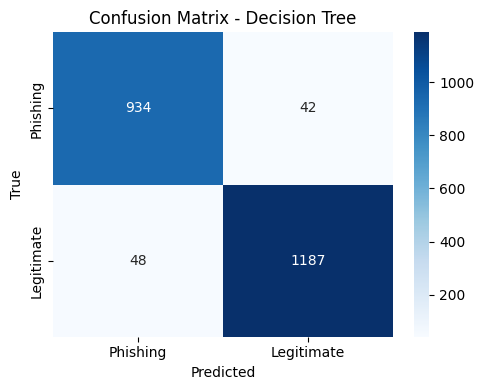

In [27]:
evaluate_model(tree, X_test, y_test, "Decision Tree")


,precision,recall,f1-score,support
Phishing,0.939,0.909,0.923,976.000
Legitimate,0.930,0.953,0.941,1235.000
accuracy,0.934,0.934,0.934,0.934
macro avg,0.934,0.931,0.932,2211.000
weighted avg,0.934,0.934,0.933,2211.000


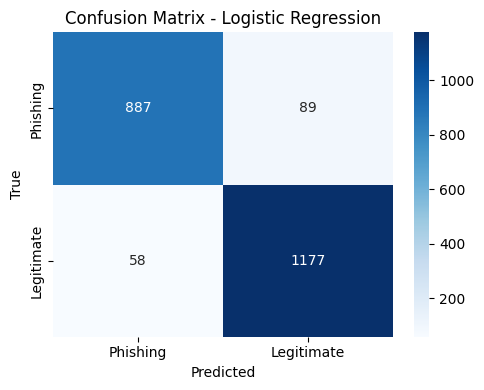

In [28]:
evaluate_model(log, X_test, y_test, "Logistic Regression")


,precision,recall,f1-score,support
Phishing,0.951,0.933,0.942,976.000
Legitimate,0.948,0.962,0.955,1235.000
accuracy,0.949,0.949,0.949,0.949
macro avg,0.950,0.948,0.949,2211.000
weighted avg,0.949,0.949,0.949,2211.000


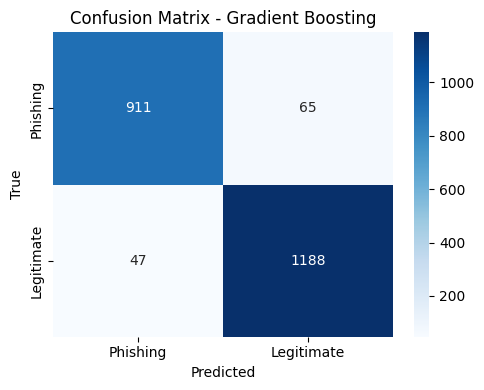

In [29]:
evaluate_model(gbc, X_test, y_test, "Gradient Boosting")


,precision,recall,f1-score,support
Phishing,0.972,0.959,0.965,976.00
Legitimate,0.968,0.978,0.973,1235.00
accuracy,0.970,0.970,0.970,0.97
macro avg,0.970,0.969,0.969,2211.00
weighted avg,0.970,0.970,0.970,2211.00


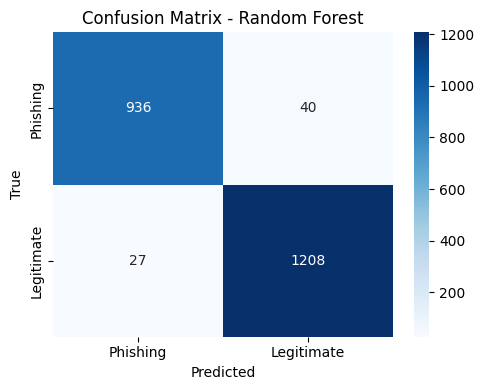

In [30]:
evaluate_model(rf, X_test, y_test, "Random Forest")


,precision,recall,f1-score,support
Phishing,0.973,0.960,0.966,976.000
Legitimate,0.969,0.979,0.974,1235.000
accuracy,0.971,0.971,0.971,0.971
macro avg,0.971,0.969,0.970,2211.000
weighted avg,0.971,0.971,0.971,2211.000


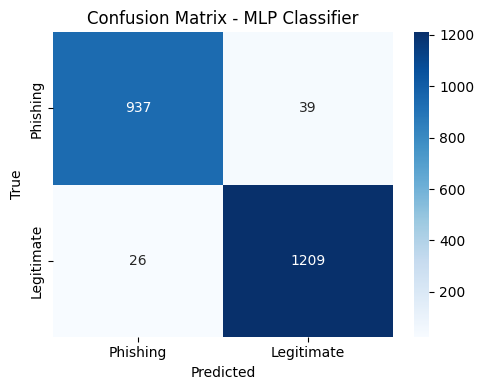

In [31]:
evaluate_model(mlp, X_test, y_test, "MLP Classifier")


,precision,recall,f1-score,support
Phishing,0.975,0.958,0.966,976.000
Legitimate,0.967,0.981,0.974,1235.000
accuracy,0.971,0.971,0.971,0.971
macro avg,0.971,0.969,0.970,2211.000
weighted avg,0.971,0.971,0.971,2211.000


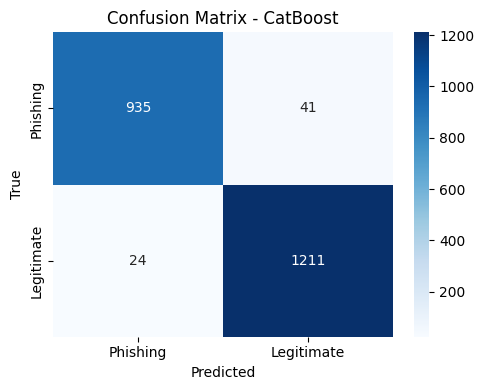

In [32]:
evaluate_model(cat, X_test, y_test, "CatBoost")


,precision,recall,f1-score,support
Phishing,0.528,0.998,0.690,976.000
Legitimate,0.995,0.294,0.454,1235.000
accuracy,0.605,0.605,0.605,0.605
macro avg,0.761,0.646,0.572,2211.000
weighted avg,0.788,0.605,0.558,2211.000


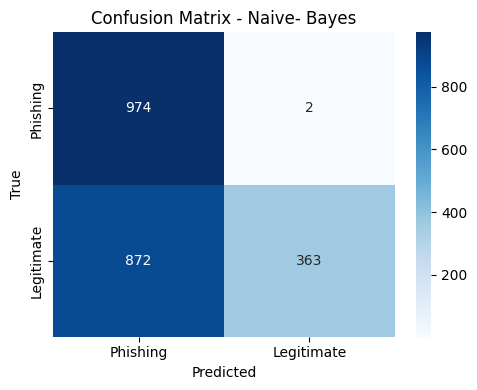

In [33]:
evaluate_model(nb, X_test, y_test, "Naive- Bayes")
                                                                             

In [34]:
evaluate_model(tabnet, X_test_np, y_test_np, "TabNet")


NameError: name 'tabnet' is not defined

In [35]:
# Cell 11 – Confusion Matrix for best model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions for test set
y_pred_best = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best, labels=[-1, 1])

# Plot confusion matrix heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Phishing (-1)", "Legitimate (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


NameError: name 'best_model' is not defined

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

tabnet_pred = tabnet.predict(X_test_np)

cm_tabnet = confusion_matrix(y_test_np, tabnet_pred, labels=[-1, 1])

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_tabnet,
    display_labels=["Phishing (-1)", "Legitimate (1)"]
)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - TabNet")
plt.show()


NameError: name 'tabnet' is not defined